## Numpy

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
p = os.path.join(os.path.dirname('__file__'), '..')
sys.path.append(p)
from common import *

### Init

In [56]:
np.ones(10).astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [58]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
# Gaussian normal distribution
np.random.randn(2,2)

array([[ 1.02501276, -0.80137552],
       [ 1.35534111, -0.25255029]])

In [62]:
# Random uniform, no params
np.random.rand(10)

array([0.65648245, 0.42343024, 0.46067578, 0.43326668, 0.1023146 ,
       0.03371074, 0.75903756, 0.00230041, 0.43291624, 0.24162462])

In [63]:
## Uniform distribution, custom
np.random.uniform(low=0,high=10,size=(2,2))

array([[6.78507343, 4.69153612],
       [5.71269122, 5.29848908]])

### Slice

In [32]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
## Reverse array
x[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [39]:
## No copy subarray (MODIFIES ORIGINAL ARRAY)
y = x[3:7]
y[2] = 999
x

array([  0,   1,   2,   3,   4, 999,   6,   7,   8,   9])

In [41]:
## Copy subarray
x = np.arange(10)

y = x[3:7].copy()
y[2] = 999
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Concat

In [5]:
# Concat 1D arrays
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [6]:
# Concat 2D along Row
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [7]:
# Concat 2D arrays along Column
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

### Stack

* Like concatenate, but for arrays of different dimensions

In [11]:
# Vertical
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [14]:
# Horizontal
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

### Functions

In [44]:
x = np.arange(1,10)

In [46]:
# Natural log (undos exponent)
np.log(x)

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458])

In [47]:
# Base 10 log
np.log10(x)

array([0.        , 0.30103   , 0.47712125, 0.60205999, 0.69897   ,
       0.77815125, 0.84509804, 0.90308999, 0.95424251])

In [50]:
# Power
x**2

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

In [53]:
# Exponentials
print(2**x)  # 2^x
np.exp(x)    # e^x

[  2   4   8  16  32  64 128 256 512]


array([2.71828183e+00, 7.38905610e+00, 2.00855369e+01, 5.45981500e+01,
       1.48413159e+02, 4.03428793e+02, 1.09663316e+03, 2.98095799e+03,
       8.10308393e+03])

### Min, Max, Sum

* Numpy's built-in methods are faster

In [60]:
big_array = np.random.rand(100000)
%timeit sum(big_array)
%timeit np.sum(big_array)

5.24 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
21.4 µs ± 43.9 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [74]:
M = np.random.uniform(1,10, (2, 3)).astype(int)
M

array([[8, 5, 4],
       [7, 2, 1]])

In [76]:
# Sum
print(np.sum(M))           # sum all cells
print(np.sum(M, axis=1))   # sum the columns
print(np.sum(M, axis=0))   # sum the rows

27
[17 10]
[15  7  5]


In [77]:
# Percent
print("25th percentile:   ", np.percentile(M, 25))
print("Median:            ", np.median(M))
print("75th percentile:   ", np.percentile(M, 75))

25th percentile:    2.5
Median:             4.5
75th percentile:    6.5


### Broadcasting

* https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html
* Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
* Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
* Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

### Masking

* https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html

In [78]:
x = np.array([1, 2, 3, 4, 5])

In [86]:
# Get boolean mask
x != 0

array([ True,  True,  True,  True,  True])

In [87]:
# Count non-zero
np.sum(x != 0)

5

In [88]:
# Compound expressions
np.sum((x > 2) & (x < 5))

2

In [92]:
# Reverse mask (NOT)
mask = (x > 2) & (x < 5)
print(mask)
print(~mask)

[False False  True  True False]
[ True  True False False  True]


In [95]:
# Get subarray from mask
x[mask]

array([3, 4])

### Bitwise operators

* &	np.bitwise_and	
* |	np.bitwise_or
* ^ np.bitwise_xor	
* ~ np.bitwise_not

In [ ]:
x[x < 5]

In [98]:
"""
`and` and `or` gauge the truth or falsehood of entire object (all elements)

`&` and `|` refer to bits within each object
"""
print(bool(42), bool(0))
print(bool(42 and 0))
print(bool(42 or 0))

True False
False
True


In [101]:
# Binary operators
bin(42 & 59)
bin(42 | 59)

'0b111011'

In [103]:
A = np.array([1, 0, 1, 0, 1, 0])
B = np.array([1, 1, 1, 0, 1, 1])
A | B

array([1, 1, 1, 0, 1, 1])

In [104]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Sorting

In [113]:
x = np.arange(1,10)
np.random.shuffle(x)   # in-place
x

array([2, 8, 7, 3, 6, 4, 5, 1, 9])

In [115]:
# Sort the array
np.sort(x) 

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [118]:
# Return the sorted indices
x, np.argsort(x)

(array([2, 8, 7, 3, 6, 4, 5, 1, 9]), array([7, 0, 3, 5, 6, 4, 2, 1, 8]))

In [127]:
X = np.random.randint(0, 10, (3, 4))
X

array([[3, 7, 2, 0],
       [7, 1, 4, 8],
       [7, 3, 6, 5]])

In [129]:
# Sort Columns
np.sort(X, axis=0)

array([[3, 1, 2, 0],
       [7, 3, 4, 5],
       [7, 7, 6, 8]])

In [131]:
# Sort Rows
np.sort(X, axis=1)

array([[0, 2, 3, 7],
       [1, 4, 7, 8],
       [3, 5, 6, 7]])

### K-Nearest Neighbors

In [133]:
# K-smallest values in the array at the beginning
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

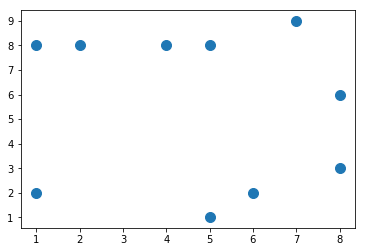

In [135]:
X = np.random.randint(1,10, (10, 2))
plt.scatter(X[:, 0], X[:, 1], s=100);

In [138]:
## Sum squared distance

# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [139]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [140]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq

array([[ 0, 53, 20, 65, 34, 20, 10, 13, 40,  9],
       [53,  0,  9, 36, 65, 61, 37, 16,  1, 74],
       [20,  9,  0, 45, 50, 40, 10,  1,  4, 41],
       [65, 36, 45,  0, 17, 25, 85, 52, 37, 50],
       [34, 65, 50, 17,  0,  2, 68, 49, 58, 13],
       [20, 61, 40, 25,  2,  0, 50, 37, 52,  5],
       [10, 37, 10, 85, 68, 50,  0,  5, 26, 37],
       [13, 16,  1, 52, 49, 37,  5,  0,  9, 34],
       [40,  1,  4, 37, 58, 52, 26,  9,  0, 61],
       [ 9, 74, 41, 50, 13,  5, 37, 34, 61,  0]])

In [141]:
dist_sq.diagonal()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [142]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 9 6 7 2 5 4 8 1 3]
 [1 8 2 7 3 6 0 5 4 9]
 [2 7 8 1 6 0 5 9 3 4]
 [3 4 5 1 8 2 9 7 0 6]
 [4 5 9 3 0 7 2 8 1 6]
 [5 4 9 0 3 7 2 6 8 1]
 [6 7 0 2 8 1 9 5 4 3]
 [7 2 6 8 0 1 9 5 4 3]
 [8 1 2 7 6 3 0 5 4 9]
 [9 5 0 4 7 6 2 3 8 1]]


In [143]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

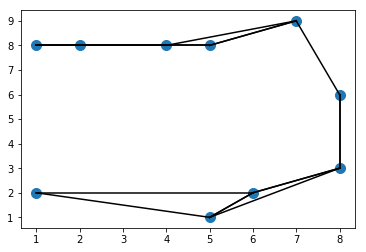

In [144]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')